<img src="../imgs/CampQMIND_banner.png">

### Introduction to Recurrent Neural Networks
Author: David Huang


Recurrent neural networks are a class of artificial neural networks, derived from vanilla feedforward networks, that are especially powerful for modeling sequence data such as time series or natural language. The power of the recurrent neural network lies in it's hidden state (h), where at any time t, the hidden layer receives input from both $x_{t}$ and $h_{t-1}$. This is better shown in this diagram: 
<img src="../imgs/RNNunfold.png">
Thus the hidden state acts as a sort of memory from previous timesteps that is fedfoward and updated with each time step.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Recurrent-Neural-Networks" data-toc-modified-id="Introduction-to-Recurrent-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Recurrent Neural Networks</a></span></li><li><span><a href="#Underlying-Math" data-toc-modified-id="Underlying-Math-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Underlying Math</a></span></li><li><span><a href="#Videos-/-Additional-Resources" data-toc-modified-id="Videos-/-Additional-Resources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Videos / Additional Resources</a></span></li><li><span><a href="#Backpropagation-through-time" data-toc-modified-id="Backpropagation-through-time-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backpropagation through time</a></span></li><li><span><a href="#Minimal-character-Implementation" data-toc-modified-id="Minimal-character-Implementation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Minimal character Implementation</a></span></li><li><span><a href="#The-Exploding-and-Vanishing-Gradients-problem" data-toc-modified-id="The-Exploding-and-Vanishing-Gradients-problem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The Exploding and Vanishing Gradients problem</a></span></li><li><span><a href="#Simple-RNN-implementation-using-Keras" data-toc-modified-id="Simple-RNN-implementation-using-Keras-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Simple RNN implementation using Keras</a></span></li></ul></div>

### Underlying Math
The general formula for each hidden state at time t is given by: 

$$h_{t} = f_{W}(h_{t-1},x_{t})$$

Given each input has a weight matrix, the formula can be expanded to: 

$$h_{t} = tanh(W_{hh}h_{t-1}+ W_{xh}x_{t})$$

Where the products of $h_{t-1}$, $x_{t}$ and their weight matrices $W_{hh}$, $W_{hx}$ respectively are combined using a tanh nonlinearity. To create an output ($y_{t}$) the hidden start is multiplied by another weight matrix $W_{hy}$:

$$y_{t} = W_{hy}h_{t}$$

### Videos / Additional Resources
Here are some additional resources you made find useful:

**towards data science** beginner guide to RNN: https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-recurrent-neural-network-873c29da73c7

**DeepLearning.TV** Provides a great short video on RNNs (video 1):

**Stanford University** provides an excellent video on the structure of RNN and RNN applications (video 2):

**Andrej Karpathy**'s is a great resource that expands on the content presented in the lecture and includes example implementation: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/_aCuOwF1ZjU',560,315)

In [2]:
IFrame('https://www.youtube.com/embed/6niqTuYFZLQ?start=528',560,315)

### Backpropagation through time
Backpropagation for RNNs is referred to as backpropagation through time (BPTT). This is because we consider each forward pass as stepping foward in time, while backpropagation would be stepping back in time.
<img src="../imgs/BPTT.png" alt="Drawing" style="width: 600px;"/>
However, considering that most RNN problems require large series data sizes conventional, BPTT would be too slow as each gradient step would require one full forward and reverse pass through the data. Instead we use truncated BPTT where we run through the sequence as a series of chunks with a gradient step being calculated after each chunk. This method carries the hidden state forward while only backpropagating through a smaller number of steps.
<img src="../imgs/BPTT2.png" alt="Drawing" style="width: 400px;"/>


### Minimal character Implementation
Basic RNN implementation is not difficult and can be written in only 112 lines of code using only numpy. 

However, using a basic implementation of RNN is __not practical__ and so the following example should be used only as reference to deepen your understanding on the implementation of the theory above. 

The following code is provided by Andrej Karpathy.

```python
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np

# data I/O
data = open('input.txt', 'r').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print =('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
seq_length = 25 # number of steps to unroll the RNN for
learning_rate = 1e-1

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, ys, ps = {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in xrange(len(inputs)):
    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
  dbh, dby = np.zeros_like(bh), np.zeros_like(by)
  dhnext = np.zeros_like(hs[0])
  for t in reversed(xrange(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dbh += dhraw
    dWxh += np.dot(dhraw, xs[t].T)
    dWhh += np.dot(dhraw, hs[t-1].T)
    dhnext = np.dot(Whh.T, dhraw)
  for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
  """ 
  sample a sequence of integers from the model 
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  ixes = []
  for t in xrange(n):
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0
while True:
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0: 
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 100 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  if n % 100 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress
  
  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by], 
                                [dWxh, dWhh, dWhy, dbh, dby], 
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter 
 ```

### The Exploding and Vanishing Gradients problem
Without diving to deeply into the mathematics, backpropagation involves adjusting each weight matrix using a gradient. This gradient is caclulated by the continuous multiplcation of derivatives at each time step. 
This recurrent multiplication leads to the exploding or vanishing gradient problem. Each gradient computation step in the gradient flow of RNNs involves the multiplication of the transpose of our weight matrix ($W_{hh}$). 

If we think of these weight matrices as scalar values, then the continuous multiplcation of any value greater than 1 will lead to an exploding gradient, while the continuous multiplcation of any value less than 1 will vanish the gradient towards 0. Therefore the usefullness of RNNs decreases with increasing series length. 

Thus modified RNN architectures such as, long short term memory (LSTM) and gated recurrent unit (GRU), have been developed to combat this problem and are go-to architectures for developers when implemeneting RNN models. 

For more information on LSTM and GRU architecture and implementation see the notebook created by Michael Olson.

### Simple RNN implementation using Keras
However, if you are curious as to how you would implement a simple RNN model using Keras, you can follow the example below. 

Depending on the initial weight matrix, this demonstration can serve as an example of the power of RNN architectures or it will be a great demonstration of the exploding / vanishing gradient problem. 

Regardless, when developing a model using RNN architecture, once again, you should be using LSTMs or GRUs.

In [1]:
%pylab inline

import math

# For this demonstration we will be predicting the values of a sin wave.
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Create our training data
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

In [4]:
# Shape of our data
X.shape, Y.shape

((100, 50, 1), (100, 1))

In [5]:
# Create validation data
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [6]:
# Required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Let's create a basic model for demonstration purposes
model = keras.models.Sequential()
simple_rnn_layer = layers.SimpleRNN((1), batch_input_shape=(None,50,1),return_sequences=False)
model.add(simple_rnn_layer)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
history = model.fit(X,Y,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5178 - accuracy: 0.0000e+00 - val_loss: 0.5191 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5069 - accuracy: 0.0000e+00 - val_loss: 0.5056 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4970 - accuracy: 0.0000e+00 - val_loss: 0.5018 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4886 - accuracy: 0.0000e+00 - val_loss: 0.4957 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4807 - accuracy: 0.0000e+00 - val_loss: 0.4891 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4738 - accuracy: 0.0000e+00 - val_loss: 0.4827 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4670 - accuracy: 0.0000e+00 - val_loss:

In [14]:
# Lets some predictions
results = model.predict(X_val)

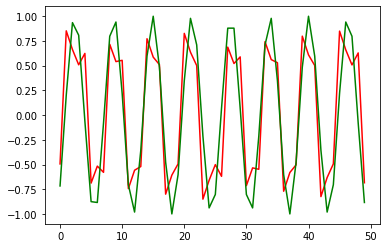

In [15]:
# Plot the results
plt.plot(results,c='r')
plt.plot(Y_val, c='g')
plt.show()

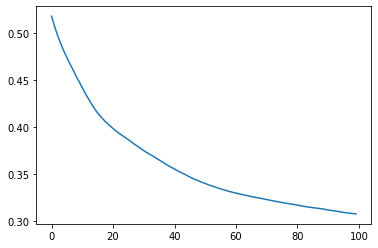

In [16]:
# Plot loss
plt.plot(history.history['loss'])
plt.show() # If the loss is still going on linearly for the last epoch continue training the model by further training the model with more epochs.